In [1]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
# Question 3
from google.colab import drive

In [4]:
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/data/mnist_test.csv', 'r') as f: 
  temp = np.genfromtxt(f,delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 3a)
X = temp[:,1:]
y = temp[:,0]
N,d = X.shape

print('# samples = %i, feature dim = %i'%(N,d))

# samples = 10000, feature dim = 784


Label=
 [[7. 2. 1. 0. 4.]
 [1. 4. 9. 5. 9.]
 [0. 6. 9. 0. 1.]
 [5. 9. 7. 3. 4.]]


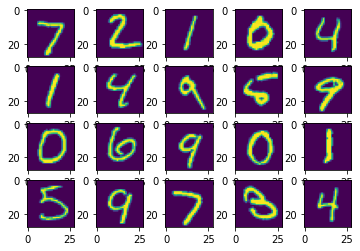

In [6]:
# 3b)
X_img = X[:20,:].reshape(20,28,28)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_img[i])
print('Label=\n', y[0:20].reshape((4,5)))

Text(0, 0.5, 'Log Magnitude of singular values')

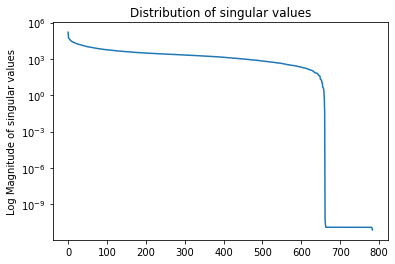

In [7]:
# 3c)
u,s,vh = np.linalg.svd(X)
plt.semilogy(s)
plt.title('Distribution of singular values')
plt.ylabel('Log Magnitude of singular values')

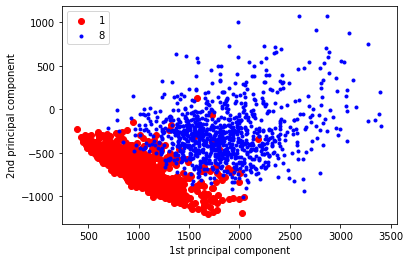

In [8]:
# 3d) Note: 
# X(10000x784), Vh(784x784), 
# Vh row vectors-> firt two component of Vh(2x784), firt two component of V(784x2)
Z = X@(vh[0:2].T)
id = [y==1,y==8]
plt.scatter(Z[id[0],0],Z[id[0],1],c='r',marker='o')
plt.scatter(Z[id[1],0],Z[id[1],1],c='b',marker='.')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend([1,8])


Label=
 [[7. 2. 1. 0. 4.]
 [1. 4. 9. 5. 9.]
 [0. 6. 9. 0. 1.]
 [5. 9. 7. 3. 4.]]


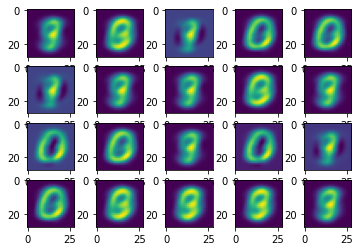

In [9]:
# 3e)
Xhat = (Z[0:20]@vh[0:2]).reshape((20,28,28))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(Xhat[i])
print('Label=\n', y[0:20].reshape((4,5)))